In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import math

# Assuming your data is loaded into df

# Handle missing values
df= pd.read_csv('movie.csv')  # Load your dataset
# For 'Age' - fill with mean rounded up
df['Age'].fillna(math.ceil(df['Age'].mean()), inplace=True)

# For 'Rating' - fill with median (or mean)
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# For categorical columns - if missing, fill with mode or 'Unknown'
for col in ['Gender', 'Occupation', 'Genre']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop 'ReviewText' and 'Timestamp' for clustering (optional)
df_clean = df.drop(columns=['UserID', 'MovieID', 'MovieTitle', 'ReviewText', 'Timestamp'])

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in ['Gender', 'Occupation', 'Genre']:
    df_clean[col] = le.fit_transform(df_clean[col])

# Normalize numerical features ('Age', 'Rating')
scaler = StandardScaler()
df_clean[['Age', 'Rating']] = scaler.fit_transform(df_clean[['Age', 'Rating']])


C:\Users\Jedi\AppData\Local\Temp\ipykernel_18184\3684387874.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(math.ceil(df['Age'].mean()), inplace=True)
C:\Users\Jedi\AppData\Local\Temp\ipykernel_18184\3684387874.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

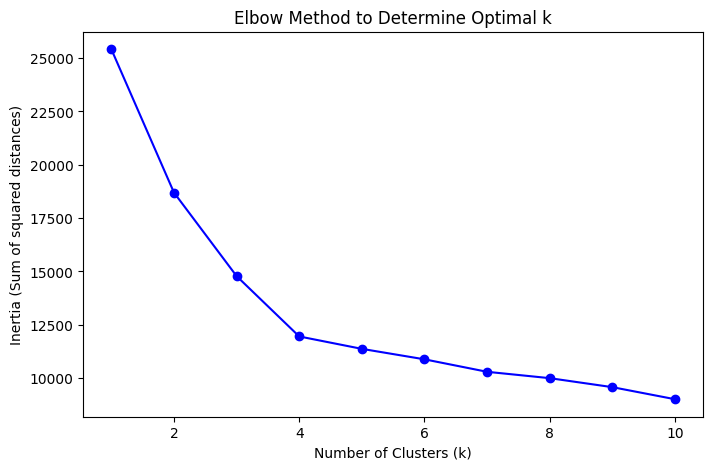

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df_clean.values

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [4]:
optimal_k = 3  # Replace with your choice after elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X)


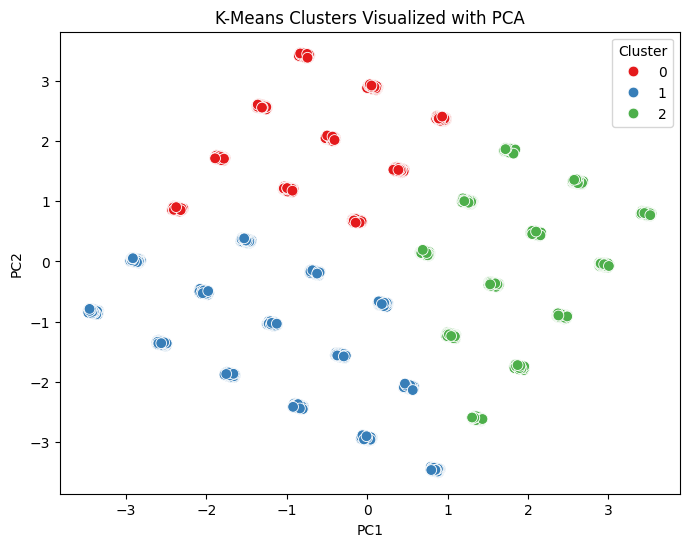

In [5]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X)

df_clean['PC1'] = components[:, 0]
df_clean['PC2'] = components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title('K-Means Clusters Visualized with PCA')
plt.show()


In [6]:
# Add cluster info back to original (or clean) df
df['Cluster'] = df_clean['Cluster']

# Group by cluster and compute mean values (for numeric features)
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Rating': 'mean',
    'Gender': lambda x: x.mode()[0],
    'Occupation': lambda x: x.mode()[0],
    'Genre': lambda x: x.mode()[0]
})

print(cluster_summary)


               Age    Rating Gender Occupation   Genre
Cluster                                               
0        38.018890  2.938100   Male  Scientist  Action
1        38.502128  3.012209   Male     Artist  Comedy
2        39.667689  2.974371   Male  Scientist  Sci-Fi
